<a href="https://colab.research.google.com/github/MayerT1/MayerT1-FSH_WorkSpace_Repo/blob/master/FSH_Hdom_Pairplot_Investigate_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
#create a symbolic link for pointing to /content/mnt/My Drive/Colab Notebooks
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path) 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [0]:
%cd /content/notebooks/
!ls

In [31]:
from google.colab import files

import seaborn as sns

import pandas as pd
from pandas import DataFrame

import numpy as np
from numpy import random



ModuleNotFoundError: ignored

# Dataframe

In [13]:
df = pd.read_csv('H_dom_LaosData.csv')
display(df)
##describe
df.describe()
##hightlight max
#df.style.highlight_max()

,MASK,X,Y,ba,volume,Hdom,H_FP1,H_FP2,H_FP3,H_FP4,H_FP5,H_FP6,H_FP7,H_FP8,H_FP9,H_FP10,H_FP11,H_LP1,H_LP2,H_LP3,H_LP4,H_LP5,H_LP6,H_LP7,H_LP8,H_LP9,H_LP10,H_LP11,P_FP1,P_FP2,P_FP3,P_FP4,P_FP5,P_FP6,P_FP7,P_FP8,P_FP9,P_FP10,P_FP11,P_LP1,P_LP2,P_LP3,P_LP4,P_LP5,P_LP6,P_LP7,P_LP8,P_LP9,P_LP10,P_LP11,S_FP1,S_FP2,S_FP3,S_FP4,S_LP1,S_LP2,S_LP3,S_LP4,HsubtrHFP9,HsubtHFP10
0,0,553231.00,1784862.00,8.58,60.42,13.25,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,2.12,2.12,2.12,2.12,2.12,2.55,2.55,2.55,2.55,2.55,2.55,0.13,0.13,2.12,2.55,3.07,3.07,4.58,4.58,4.58,4.58,4.58,0.03,0.04,0.31,2.12,2.12,2.12,2.12,2.55,2.55,2.55,2.55,6.28,5.02,2.03,0.83,2.58,2.34,2.39,0.60,6.97,6.97
1,1,553240.00,1785016.00,20.69,116.28,12.75,10.37,10.37,10.54,10.54,12.60,13.03,13.03,13.10,13.17,13.20,13.20,12.60,12.60,12.60,12.60,13.03,13.03,13.03,13.17,13.17,13.17,13.17,8.99,8.99,10.37,10.46,12.60,12.60,13.03,13.10,13.17,13.20,13.20,12.60,12.60,12.60,12.60,12.60,13.03,13.03,13.03,13.17,13.17,13.17,11.88,11.22,1.40,1.00,13.00,11.35,1.97,1.00,0.42,0.45
2,2,553236.00,1785173.00,7.29,38.17,6.51,7.95,7.99,8.66,8.83,8.99,11.59,11.59,11.59,11.59,11.96,11.96,7.98,7.98,7.98,7.98,7.98,7.98,7.98,9.63,9.63,9.67,9.67,7.10,7.10,7.99,8.83,8.99,9.05,9.16,11.59,11.96,11.96,11.96,0.43,0.43,3.33,3.79,9.63,9.63,9.63,9.67,9.67,9.67,9.67,10.47,8.54,1.07,1.00,7.98,7.22,1.50,0.78,5.08,5.45
3,3,553216.00,1785343.00,17.92,123.53,13.10,6.88,7.30,9.25,9.44,9.68,10.46,11.18,11.26,11.35,11.69,12.30,2.39,5.21,7.17,7.17,8.46,10.46,11.26,11.35,11.38,11.69,11.69,6.88,7.30,9.25,9.50,9.68,10.46,11.23,11.26,11.38,11.69,12.30,0.40,5.21,7.17,8.46,10.46,11.26,11.26,11.35,11.38,11.69,11.69,10.19,10.08,1.09,1.00,8.50,8.69,1.44,1.00,1.75,1.41
4,4,553223.00,1785494.00,3.51,17.84,7.25,4.24,4.43,5.93,8.97,9.03,9.13,9.23,9.36,9.86,9.96,9.98,0.06,0.06,0.06,0.06,0.06,0.20,0.20,0.20,0.20,0.20,0.20,4.24,4.43,8.66,8.97,9.06,9.13,9.23,9.73,9.86,9.96,9.98,0.01,0.01,0.03,0.04,0.06,0.06,0.07,0.20,0.20,0.20,0.20,8.52,8.38,2.92,0.94,0.16,0.30,2.60,0.43,2.61,2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,299,535216.00,1793189.00,18.79,81.10,9.25,10.73,10.73,13.26,13.27,13.33,13.92,13.97,14.17,14.42,14.98,14.98,10.73,10.73,13.26,13.27,13.33,13.92,13.97,14.17,14.42,14.98,14.98,10.73,10.73,13.26,13.27,13.33,13.92,13.97,14.17,14.42,14.98,14.98,10.73,10.73,13.26,13.27,13.33,13.92,13.97,14.17,14.42,14.98,14.98,13.72,13.16,1.12,1.00,13.72,13.10,1.26,1.00,5.17,5.73
300,300,535164.00,1793213.00,9.37,57.70,14.00,11.47,12.19,13.12,13.48,14.23,14.49,15.46,16.29,16.30,16.67,16.98,13.12,13.12,13.48,13.54,14.22,14.68,14.69,16.29,16.30,16.67,16.98,11.47,11.47,13.12,14.18,14.23,15.46,16.14,16.29,16.30,16.67,16.98,13.12,13.12,13.12,13.48,14.23,14.68,15.46,16.29,16.30,16.67,16.98,14.11,14.03,1.02,1.00,14.50,13.51,1.00,1.00,2.30,2.67
301,301,535059.00,1793279.00,14.67,95.18,15.00,11.31,11.82,12.36,12.68,12.74,13.74,13.86,14.25,14.73,14.85,14.85,7.06,9.60,11.82,12.08,12.36,13.74,13.86,14.25,14.73,14.85,14.85,11.31,11.31,11.82,12.36,12.68,13.36,13.86,14.25,14.73,14.85,14.85,2.27,9.60,11.82,12.08,12.36,13.74,13.86,14.25,14.73,14.85,14.85,13.20,12.62,0.98,1.00,12.32,12.36,1.14,1.00,0.27,0.15
302,302,534930.00,1793356.00,19.76,133.18,14.69,14.55,14.97,16.01,16.22,16.37,16.48,16.82,17.03,17.05,17.21,17.21,11.76,14.97,15.06,16.01,16.22,16.46,16.65,17.03,17.05,17.21,17.21,14.55,14.55,14.97,16.01,16.37,16.48,16.82,16.87,17.03,17.05,17.21,11.76,11.76,14.97,16.01,16.22,16.37,16.48,17.03,17.05,17.21,17.21,16.39,15.72,1.00,1.00,15.79,15.69,1.07,1.00,2.36,2.52


,MASK,X,Y,ba,volume,Hdom,H_FP1,H_FP2,H_FP3,H_FP4,H_FP5,H_FP6,H_FP7,H_FP8,H_FP9,H_FP10,H_FP11,H_LP1,H_LP2,H_LP3,H_LP4,H_LP5,H_LP6,H_LP7,H_LP8,H_LP9,H_LP10,H_LP11,P_FP1,P_FP2,P_FP3,P_FP4,P_FP5,P_FP6,P_FP7,P_FP8,P_FP9,P_FP10,P_FP11,P_LP1,P_LP2,P_LP3,P_LP4,P_LP5,P_LP6,P_LP7,P_LP8,P_LP9,P_LP10,P_LP11,S_FP1,S_FP2,S_FP3,S_FP4,S_LP1,S_LP2,S_LP3,S_LP4,HsubtrHFP9,HsubtHFP10
count,304.00000,304.000000,3.040000e+02,304.000000,304.00000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,151.50000,547872.421480,1.788765e+06,16.614309,113.86273,12.348191,8.530362,8.950625,9.872007,10.492138,11.199539,11.689507,12.058651,12.456053,12.972730,13.294046,13.417664,6.351743,6.523257,7.149671,7.526645,8.151447,8.997829,9.293059,9.900987,10.323553,10.689539,10.738651,6.368257,7.463454,9.298388,10.448454,11.156842,11.708750,12.218618,12.657895,13.024868,13.329507,13.372336,2.387928,3.073026,4.775855,6.312632,7.343816,8.604934,9.139803,9.620033,9.905921,10.041546,10.056053,11.248158,10.798717,1.322566,0.965428,8.895033,7.961382,1.547763,0.815263,3.402500,3.505329
std,87.90146,5412.513302,3.150421e+03,13.460566,121.45082,4.235360,4.254464,4.371167,4.681798,4.899562,5.067984,5.059432,5.188320,5.287284,5.355684,5.411731,5.472448,4.657001,4.722020,4.891281,5.067175,5.289704,5.592627,5.753261,5.835489,6.012824,6.262976,6.320364,5.045635,4.752122,4.868794,5.096466,5.171069,5.257602,5.274701,5.411949,5.430629,5.509672,5.538815,3.986274,4.270676,5.172121,5.605858,6.046660,6.006108,6.169320,6.399626,6.608319,6.772479,6.789695,4.698190,4.669419,0.430559,0.082385,4.830057,4.869260,0.645812,0.191106,3.100712,3.110089
min,0.00000,534258.000000,1.782888e+06,0.000000,0.00000,0.000000,0.130000,0.130000,0.130000,0.130000,0.140000,0.280000,0.280000,0.280000,0.280000,0.280000,0.280000,0.050000,0.060000,0.060000,0.060000,0.060000,0.140000,0.140000,0.140000,0.140000,0.140000,0.140000,0.030000,0.030000,0.050000,0.050000,0.080000,0.080000,0.090000,0.090000,0.090000,0.090000,0.090000,0.010000,0.010000,0.010000,0.010000,0.010000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.350000,0.270000,0.720000,0.500000,0.160000,0.000000,0.000000,0.250000,0.000000,0.050000
25%,75.75000,545567.250000,1.785358e+06,8.617500,48.39500,9.000000,5.552500,5.700000,6.467500,6.915000,7.662500,8.185000,8.545000,8.870000,9.255000,9.575000,9.612500,2.317500,2.390000,2.877500,3.067500,3.230000,4.030000,4.457500,4.862500,5.055000,5.392500,5.392500,1.927500,4.277500,5.707500,6.815000,7.547500,8.097500,8.552500,9.005000,9.345000,9.575000,9.587500,0.120000,0.180000,0.320000,1.267500,2.177500,3.035000,3.272500,3.400000,3.440000,3.440000,3.440000,7.930000,7.345000,1.050000,1.000000,4.760000,4.055000,1.160000,0.670000,1.125000,1.247500
50%,151.50000,548803.500000,1.790415e+06,13.640000,85.72500,12.075000,8.275000,8.485000,9.285000,9.680000,10.555000,11.280000,11.510000,12.020000,12.440000,12.690000,12.810000,5.645000,5.645000,6.655000,7.280000,8.145000,9.070000,9.310000,9.670000,10.155000,10.470000,10.470000,5.840000,7.125000,8.650000,9.625000,10.365000,11.350000,11.800000,12.060000,12.475000,12.785000,12.810000,0.340000,0.655000,2.635000,4.360000,6.025000,8.355000,8.580000,9.585000,9.605000,9.605000,9.605000,10.670000,10.095000,1.175000,1.000000,8.830000,7.570000,1.440000,0.840000,2.590000,2.760000
75%,227.25000,553013.500000,1.791188e+06,21.105000,147.68500,14.825000,11.295000,11.852500,12.952500,13.490000,14.440000,14.992500,15.477500,16.005000,16.

In [0]:
list(df.columns.values)

# BA and Volume

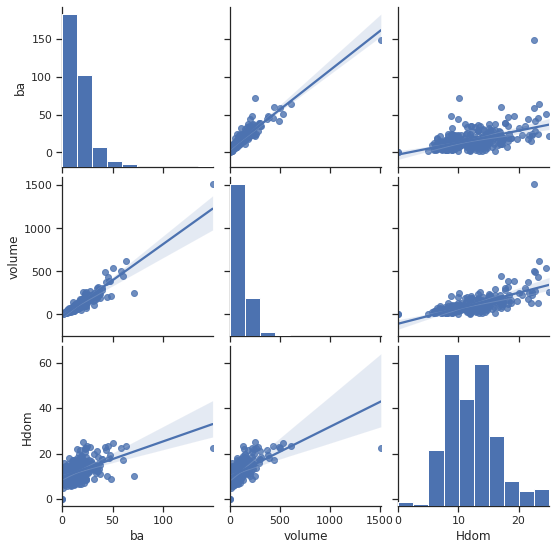

In [30]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
#iris = sns.load_dataset("iris")
g = sns.pairplot(df, kind="reg", vars=["ba", "volume", 'Hdom'])

# Hdom

0      13.25
1      12.75
2       6.51
3      13.10
4       7.25
       ...  
299     9.25
300    14.00
301    15.00
302    14.69
303    17.00
Name: Hdom, Length: 304, dtype: float64

sum stat


,Hdom
count,304.000000
mean,12.348191
std,4.235360
min,0.000000
25%,9.000000
50%,12.075000
75%,14.825000
max,25.070000


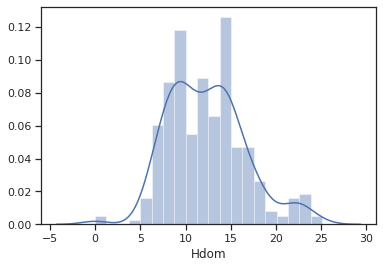

In [29]:
# Import library and dataset
import seaborn as sns
 
Hdom_df = df.loc[:,'Hdom']
display(Hdom_df)


# Control the number of bins
sns.distplot( Hdom_df, bins=20 )



##sum stat
print("sum stat")
df[["Hdom"]].describe()



# Mapping
https://towardsdatascience.com/walkthrough-mapping-gis-data-in-python-92c77cd2b87a

In [33]:
# Add gis packages to colab environment
!pip install geopandas
!apt-get install -y libspatialindex-dev
!pip install rtree


# Then import packages
import pandas as pd  # provides interface for interacting with tabular data
import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
import rtree  # supports geospatial join

     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 14.7MB 300kB/s 
     |████████████████████████████████| 10.9MB 47.5MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (667 kB/s)
Selecting previously u